In [1]:
import tensorflow
from keras.layers import Dense,MaxPooling2D,Flatten,Dropout
from keras.models import Sequential
from tensorflow.keras import initializers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
import numpy as np
import pandas as pd
from tensorflow import keras

# Data Preperation

In [2]:
path=r'C:\Users\bisht\Downloads\archive (57)\smokingVSnotsmoking\dataset\training_data'

In [3]:
val_path=r'C:\Users\bisht\Downloads\archive (57)\smokingVSnotsmoking\dataset\validation_data'

In [4]:
# val Data
val_datagen = ImageDataGenerator(rescale=1./255)
val_data = val_datagen.flow_from_directory(
    directory=val_path,
    class_mode='binary',
    target_size=(224, 224),
    batch_size=16,
    shuffle=True,

)

Found 400 images belonging to 2 classes.


In [5]:
#Train Data
train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,zoom_range=0.2)
train = train_datagen.flow_from_directory(
    directory=path,
    class_mode='binary',
    target_size=(224, 224),
    batch_size=16,
    shuffle=True,

)

Found 1610 images belonging to 2 classes.


# Data exploration

In [6]:
# for training data 
images, labels = next(train)

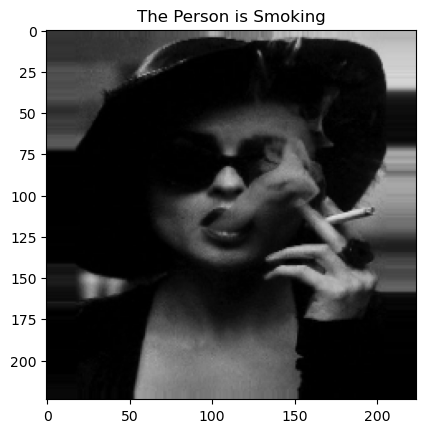

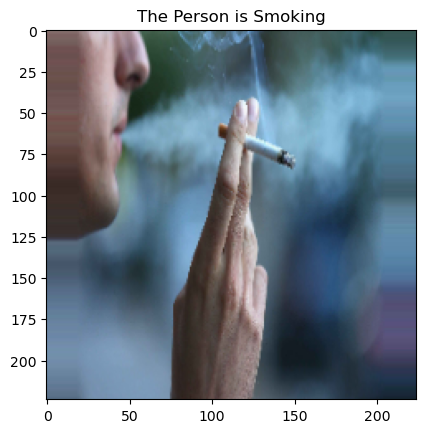

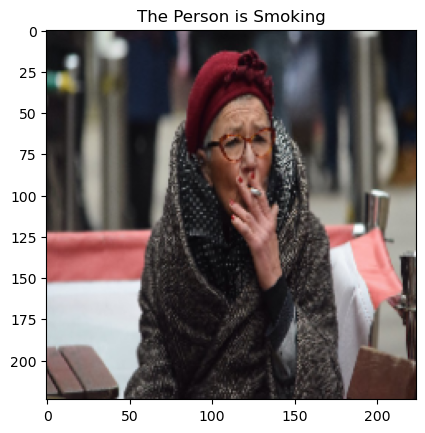

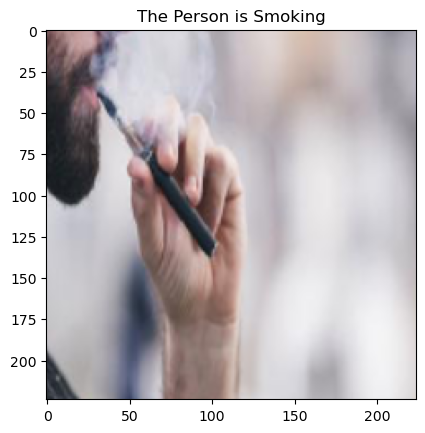

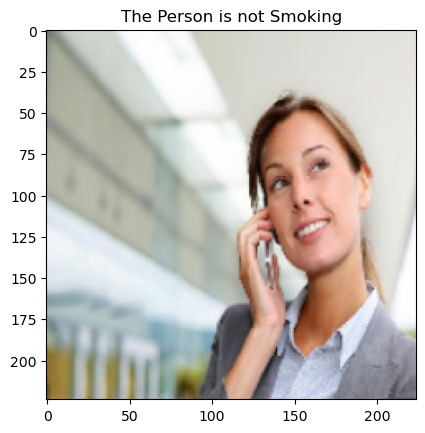

In [7]:
import matplotlib.pyplot as plt
for i in range(0,5):
    image = images[i]
    
    plt.imshow(image)
    if labels[i]==1:
        plt.title('The Person is Smoking')
    else:
        plt.title('The Person is not Smoking')
    plt.show()

In [8]:
images, labels = next(val_data)

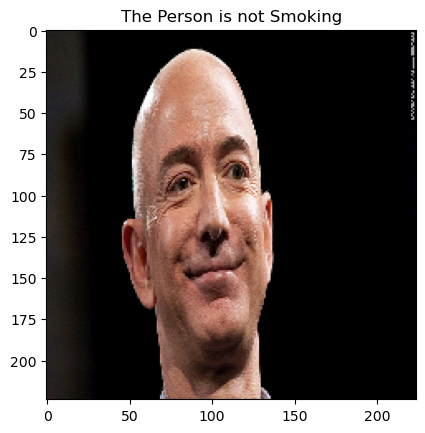

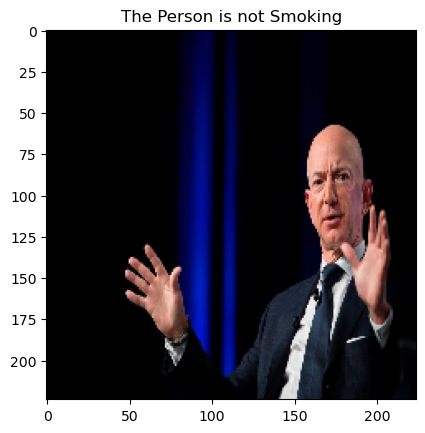

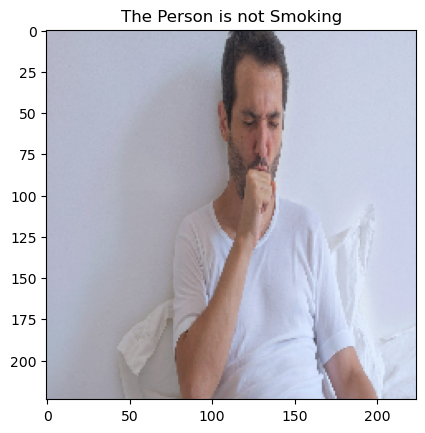

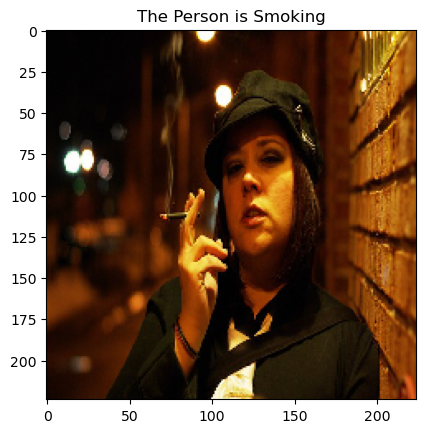

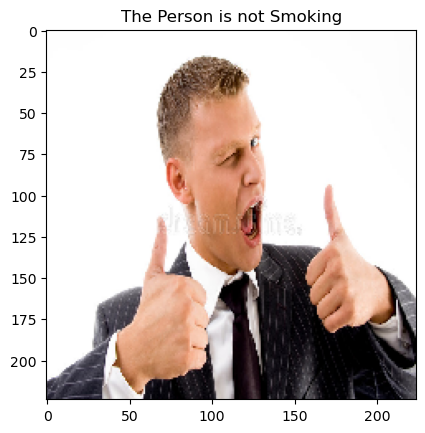

In [9]:
import matplotlib.pyplot as plt
for i in range(0,5):
    image = images[i]
    plt.imshow(image)
    if labels[i]==1:
        plt.title('The Person is Smoking')
    else:
        plt.title('The Person is not Smoking')
    plt.show()

# Model Building

In [10]:
conv_base=VGG16(weights='imagenet',
                include_top=False,
                input_shape=(224,224,3))

In [11]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


In [13]:
conv_base.trainable=False

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 32)                802848    
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [15]:
from keras.callbacks import ModelCheckpoint

In [16]:
model_checkpoint=ModelCheckpoint(filepath=r'C:\Users\bisht\Deep Learning\Text Classification\model_weights.h5',save_weights_only=True,monitor='val_accuracy',mode='max',save_best_only=True)

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [18]:
model.fit(train, epochs=20,validation_data=val_data, batch_size=16,callbacks=[model_checkpoint])  # Adjust batch_size as needed


Epoch 1/20
101/101 [==============================] - 233s 2s/step - loss: 0.6585 - accuracy: 0.6230 - val_loss: 0.5157 - val_accuracy: 0.7700
Epoch 2/20
101/101 [==============================] - 234s 2s/step - loss: 0.5342 - accuracy: 0.7298 - val_loss: 0.4980 - val_accuracy: 0.7700
Epoch 3/20
101/101 [==============================] - 239s 2s/step - loss: 0.4719 - accuracy: 0.7565 - val_loss: 0.4208 - val_accuracy: 0.8075
Epoch 4/20
101/101 [==============================] - 236s 2s/step - loss: 0.4476 - accuracy: 0.7733 - val_loss: 0.3753 - val_accuracy: 0.8375
Epoch 5/20
101/101 [==============================] - 236s 2s/step - loss: 0.4198 - accuracy: 0.7863 - val_loss: 0.3700 - val_accuracy: 0.8425
Epoch 6/20
101/101 [==============================] - 240s 2s/step - loss: 0.4343 - accuracy: 0.7634 - val_loss: 0.5220 - val_accuracy: 0.7650
Epoch 7/20
101/101 [==============================] - 232s 2s/step - loss: 0.4061 - accuracy: 0.7901 - val_loss: 0.4135 - val_accuracy: 0.8150

In [101]:
class_mapping = train.class_indices
print("Class Mapping:", class_mapping)

Class Mapping: {'notsmoking': 0, 'smoking': 1}


In [19]:
import cv2 as cv
def predict_image(path):
    pred=[]
    img=path
    img=plt.imread(img)
    plt.imshow(img)
    img=cv.resize(img,(224,224))
    img = img.reshape(1, 224, 224, 3).astype('float32') / 255.0
    prediction = (model.predict(img) > 0.5).astype("int32")[0][0]
    if prediction==0:
        pred.append('Not Smoking')
    else:
        pred.append('Smoking')
    plt.title(f'The person is {pred[0]}')
    plt.show()

# Predictions

1/1 [==============================] - 0s 119ms/step


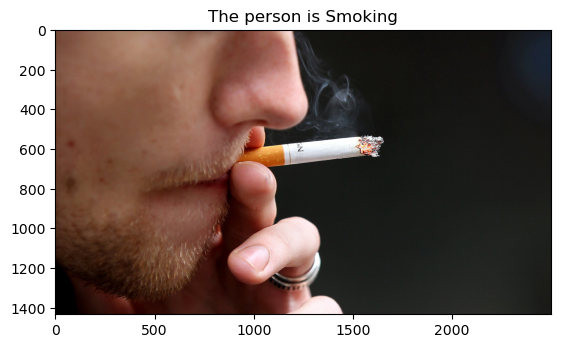

1/1 [==============================] - 0s 122ms/step


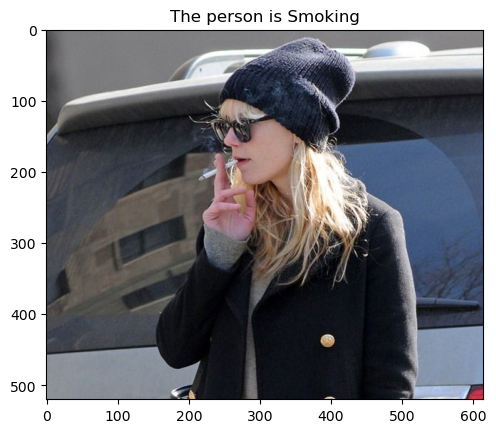

1/1 [==============================] - 0s 126ms/step


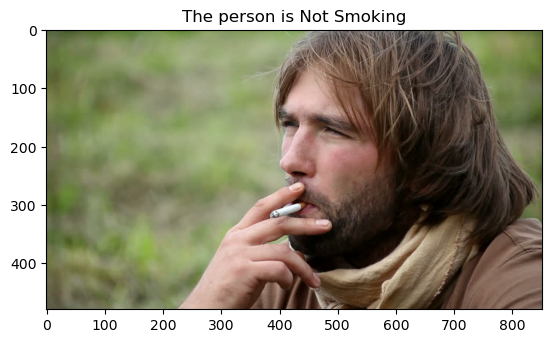

1/1 [==============================] - 0s 144ms/step


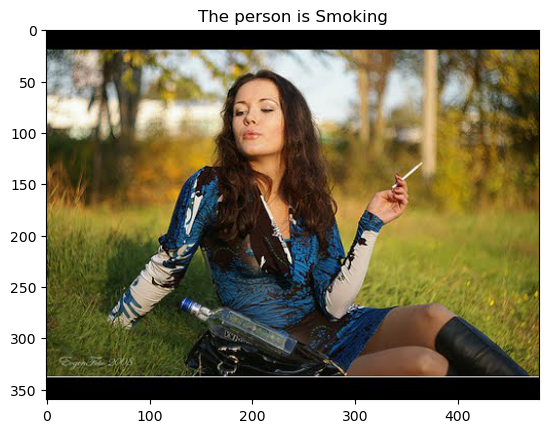

1/1 [==============================] - 0s 144ms/step


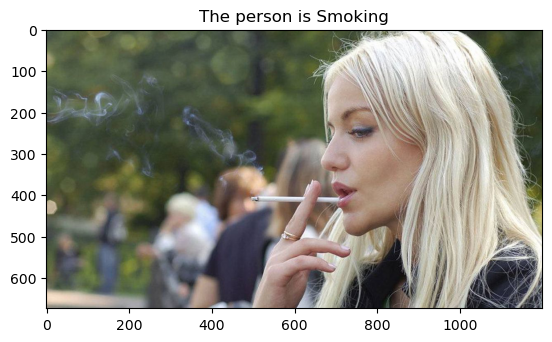

1/1 [==============================] - 0s 131ms/step


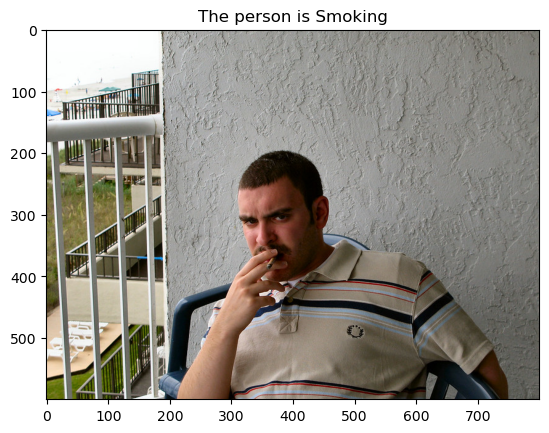

1/1 [==============================] - 0s 135ms/step


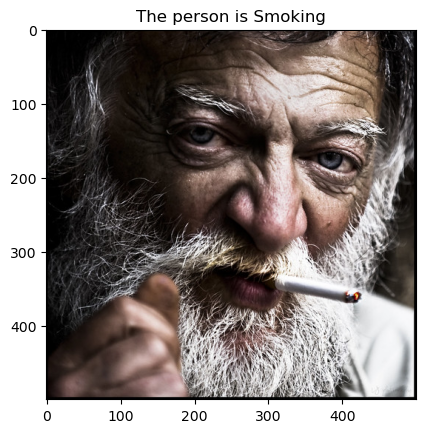

In [33]:
for i in range(1,8):
    predict_image(r"C:\Users\bisht\Downloads\archive (57)\smokingVSnotsmoking\dataset\testing_data\abc00{}.jpg".format(i))

# Model Saving


In [35]:
from keras.models import load_model


In [36]:
model.save('SmokingClassification.h5')

C:\Users\bisht\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 160ms/step
[[0.]]
1/1 [==============================] - 0s 145ms/step
[[0.]]
1/1 [==============================] - 0s 129ms/step
[[0.]]
1/1 [==============================] - 0s 153ms/step
[[0.]]
1/1 [==============================] - 0s 139ms/step
[[0.]]
1/1 [==============================] - 0s 142ms/step
[[0.]]
1/1 [==============================] - 0s 124ms/step
[[0.]]
1/1 [==============================] - 0s 129ms/step
[[0.]]
1/1 [==============================] - 0s 130ms/step
[[0.]]
1/1 [==============================] - 0s 135ms/step
[[0.]]
1/1 [==============================] - 0s 142ms/step
[[0.]]
1/1 [==============================] - 0s 125ms/step
[[0.]]
1/1 [==============================] - 0s 125ms/step
[[0.]]
1/1 [==============================] - 0s 121ms/step
[[0.]]
1/1 [==============================] - 0s 120ms/step
[[0.]]
1/1 [==============================] - 0s 149ms/step
[[0.]]
1/1 [==============================] - 0

1/1 [==============================] - 0s 142ms/step
[[0.]]
1/1 [==============================] - 0s 141ms/step
[[0.]]
1/1 [==============================] - 0s 149ms/step
[[0.]]
1/1 [==============================] - 0s 162ms/step
[[0.]]
1/1 [==============================] - 0s 142ms/step
[[0.]]
1/1 [==============================] - 0s 136ms/step
[[0.]]
1/1 [==============================] - 0s 131ms/step
[[0.]]
1/1 [==============================] - 0s 137ms/step
[[0.]]
1/1 [==============================] - 0s 130ms/step
[[0.]]
1/1 [==============================] - 0s 131ms/step
[[0.]]
1/1 [==============================] - 0s 134ms/step
[[0.]]
1/1 [==============================] - 0s 138ms/step
[[0.]]
1/1 [==============================] - 0s 131ms/step
[[0.]]
1/1 [==============================] - 0s 168ms/step
[[0.]]
1/1 [==============================] - 0s 136ms/step
[[0.]]
1/1 [==============================] - 0s 149ms/step
[[0.]]
1/1 [==============================] - 0

KeyboardInterrupt: 